## Introduction

Your assignment will be to shed some light on a mysterious event observed by IRIS. At around 09:00 on 2015-03-19, IRIS observed an unusual event at the solar limb. A swirling mass of gas was hovering above the solar surface, and it erupted at some point. You can read a short description about this event on an IRIS [movie of the day](http://iris.lmsal.com/mod?cmd=view-pod&pubDate=2018-08-03&index=0). Unfortunately, only one IRIS SJI camera was used, and the field of view covers very little of the solar disk, so we have no context information. Your task will be to use AIA and IRIS to uncover what was going on.

You should have downloaded the [IRIS SJI 1400 file](http://sdc.uio.no/search/file/iris_l2_20150319_090911_3860359580_SJI_1330_t000.fits) for this event. You can also have a look at the [IRIS event page](http://www.lmsal.com/hek/hcr?cmd=view-event&event-id=ivo%3A%2F%2Fsot.lmsal.com%2FVOEvent%23VOEvent_IRIS_20150319_090911_3860359580_2015-03-19T09%3A09%3A112015-03-19T09%3A09%3A11.xml) for more information about the observation and some quicklook movies. This FITS file contains 1920 images, and therefore the quicklook movies are very large (see the IRIS [movie of the day event](http://iris.lmsal.com/mod?cmd=view-pod&pubDate=2018-08-03&index=0) for a smaller movie). In this assignment, we are interested in the images around the eruption, and will not use most of the other images.

Because this IRIS dataset covers mostly the region outside the solar limb, there is very little light. In addition, 140 nm images have more contrast than the 283.2 nm images we saw before. This makes it hard to actually see the material outside the solar limb with the default (linear) scaling. For example, plotting image index 700:

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 9]

from irispy.sji import read_iris_sji_level2_fits

import warnings
warnings.filterwarnings("ignore")

sji = read_iris_sji_level2_fits("iris_l2_20150319_090911_3860359580_SJI_1330_t000.fits")

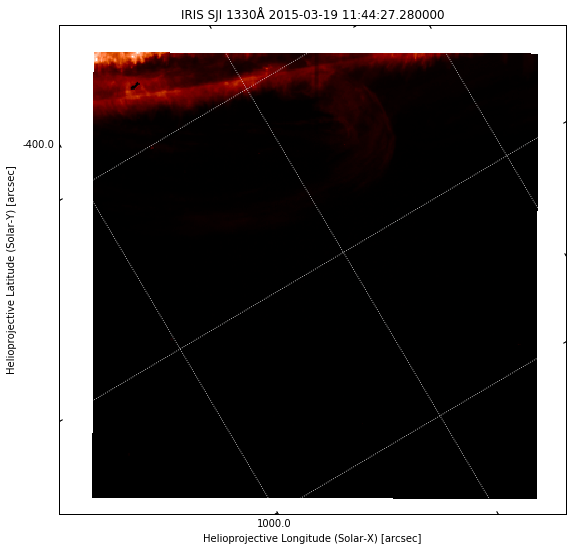

In [80]:
plt.figure()
ax = plt.subplot(projection=sji.wcs.dropaxis(-1))
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.grid(color='w', ls=':')
ax.set_xlabel("Helioprojective Longitude (Solar-X) [arcsec]")
ax.set_ylabel("Helioprojective Latitude (Solar-Y) [arcsec]")
ax.set_title("IRIS SJI %.0fÅ %s" % (sji.meta['TWAVE1'],
                                    sji.extra_coords['TIME']['value'][1000]))
img = ax.imshow(sji[700].data, cmap='irissji1330', vmin=0, vmax=1500)
plt.show()

The off-limb image is difficult to see. To make it more visible, we can saturate the image more (e.g. set `vmax=100` in the `imshow` call above), but then the brighter parts become very saturated and it is difficult to see any structure. Another option is to use non-linear scaling. Log scale is an option (e.g. use `np.log10(sji[700].data)` in `imshow` above), or we can use a [Gamma correction](https://en.wikipedia.org/wiki/Gamma_correction), which is simply taking the image to an exponent. In this case we get good results with a Gamma of 0.3:

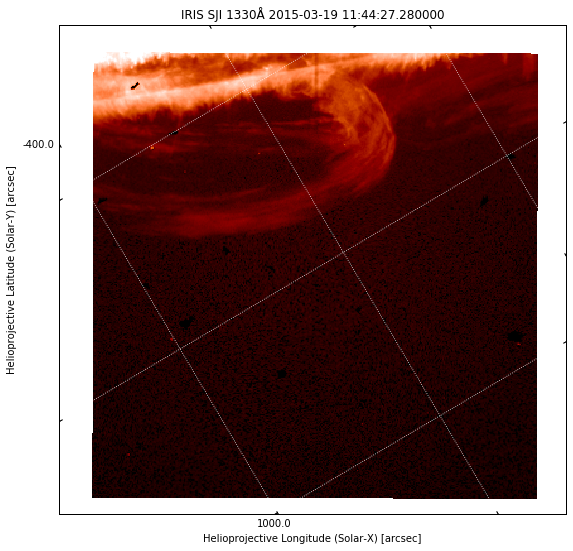

In [76]:
plt.figure()
ax = plt.subplot(projection=sji.wcs.dropaxis(-1))
ax.coords[0].set_major_formatter('s.s')
ax.coords[1].set_major_formatter('s.s')
ax.grid(color='w', ls=':')
ax.set_xlabel("Helioprojective Longitude (Solar-X) [arcsec]")
ax.set_ylabel("Helioprojective Latitude (Solar-Y) [arcsec]")
ax.set_title("IRIS SJI %.0fÅ %s" % (sji.meta['TWAVE1'],
                                    sji.extra_coords['TIME']['value'][700]))
# trick with sign and abs to avoid negative numbers before taking power
# (these would give NaNs because powers are calculated with logarithms)
tmp = np.sign(sji[700].data) * np.abs(sji[700].data) ** 0.3
img = ax.imshow(tmp, cmap='irissji1330', vmin=0.5, vmax=1000**0.3)
plt.show()

Now we can see more details in the image. This is what is done for the quicklook movies. We use a trick above with `np.sign` and `np.abs` to ensure we are taking the power of a positive number. Otherwise, we could end up with floating point errors because logarithms are used internally, and we would see white dots in the image above. 

!!! info "IRIS scans"
    In this dataset, IRIS is scanning, meaning that the field of view is moving between several positions. This image movement is taken into account when they are saved into the level 2 FITS files, and extra padding (negative or zero numbers) is included on the sides of the image array to account for the full motion of the camera. This way, the Sun stays at a fixed position in the image, while the exposed area moves. This can be seen clearly in the quicklook movies.

## Questions

### When did the eruption take place?

1. At what (approximate) time did the eruption take place, or was brightest? 
2. What index does this time correspond to in the 1400 images? Make a plot of the IRIS image at this time.
3. Did you notice anything odd in the disk part of the 1400 images before or during the eruption?

??? hint
    Look at the quicklook movies to find the approximate time of the eruption. Remember that SJI observing times are saved in `sji.extra_coords['TIME']['value']`.


*Enter your answer here*

In [84]:
# Enter code to support your answer here

### What does AIA tell you about the eruption?

1. Download one AIA 171 image at approximately the same time as the IRIS eruption. Calibrate, rotate it to the IRIS rotation and make a plot of this image for a region about twice as large as the IRIS field. Overplot the IRIS SJI field-of-view.
2. Do you see any CCD blooming or diffraction pattern around the erupting material in 171?
3. Download an AIA 94 image observed on `2015-03-19T12:48:13`. Make a side-by-side comparison with an IRIS image taken at the same time (again, will be helpful to rotate AIA to match IRIS, and to overplot the IRIS field-of-view). Do you find any similar features? What does this tell you about the formation temperature of some features in the IRIS image?

??? hint
    To make the plots you can copy paste much of the example code (adjusted to your needs!). For question 3., remember that AIA 94 Å images are formed at about 6 million K, while IRIS 1300 Å images have contributions from C II (~15,000 K) and Fe XXI (about 10 million K).

*Enter your answer here*

In [ ]:
# Enter code for your answer here

*Feel free to insert more text and code cells, if you want to explain in between code parts.*

### How fast are things moving?

1. Measure the speed (in km/s) in the IRIS images of the blob of plasma whose tip is at (x,y)=(936″,-366″.6), at `2015-03-19 09:34:20.95`. You only need to measure a few frames to get an approximate speed.
2. Choose a moving blob of fast-moving plasma, at `2015-03-19 12:33:21.63` or after (ie, after the eruption) and measure its speed in km/s. Make plots showing your chosen blob in the beginning and at the end of your measuring interval.

??? hint
    To measure speeds, you need to measure the position of a feature in different images, then divide the displacement by the time difference. To minimise uncertainties, you can do this for 3-5 images and take the mean speed.

*Enter your answer here*

In [85]:
# Enter code for your answer here

*Feel free to insert more text and code cells, if you want to explain in between code parts.*

## Format and assessment criteria

The assignment should be handed in as a Jupyter notebook, which will be your report for this lab. Please use the [template](template.ipynb), which contains the questions and includes code cells where you should enter code that does what is required to answer the questions. You are free to modify the notebook in any way you see fit, but please keep the original questions. Answering questions will require not just code, but also written text to justify your choices and answer the question. 

The assignment will be marked according to the following criteria:

* All code cells must run (when executed sequentially) and perform what is expected, **without giving any errors** (warnings are ok!).
* The code should be concise and not require excessive computations/downloads. Extra points will be given to clean, readable code while messy or redundant code will be penalised.
* Explanations for the code should be written in markdown (text) cells. The language and length of the replies will also be marked. It should be clean and concise.

## Tips and suggestions

!!! note "Data exploration vs. presentation"
    It is important to make a distinction between your final report (presentation) and the steps you took to find out the answer (exploration). It is probably a good idea to create a new notebook for experiments, and only fill in the report notebook when you have a working answer. Your exploration steps will be by definition less polished and prone to trial and error (which is normal!). 
    
!!! note "Matplotlib interactive mode"
    So far we have started all notebooks by using `%matplotlib inline`, which will display the figures as inline images in the notebook. This is the option you should use for your final report. However, for exploring it can be convenient to use an interactive display, which lets you interact with the plot and get coordinates for the mouse position. To use an interactive display, you can use instead `%matplotlib widget` (displays an interactive figure in the browser), or `%matplotlib qt` (displays an external window, but requires the Qt backend). When using an interactive display with IRISPy, doing `sji.plot()` will have a play/pause button that lets you watch the image sequence as a movie. 
    
!!! warning "File downloads"
    Keep an eye your file downloads (that you get through `Fido`), and make sure the final report includes all steps necessary to download the files you really need to answer the questions.
    